In [ ]:
#Q.1

Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 

Model -- model of the car
Price  -- Offer Price in EUROs	
Age_08_04 -- Age in months as in August 2004	
Mfg_Month -- Manufacturing month (1-12)	
Mfg_Year	-- Manufacturing Year
KM -- Accumulated Kilometers on odometer
Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
HP -- Horse Power
Met_Color	 -- Metallic Color?  (Yes=1, No=0)
Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
Automatic	-- Automatic ( (Yes=1, No=0)
cc -- Cylinder Volume in cubic centimeters
Doors -- Number of doors
Cylinders	-- Number of cylinders
Gears -- Number of gear positions
Quarterly_Tax -- Quarterly road tax in EUROs
Weight -- Weight in Kilograms
Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
Guarantee_Period -- 	Guarantee period in months
ABS -- Anti-Lock Brake System (Yes=1, No=0)
Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
Airco -- Airconditioning  (Yes=1, No=0)
Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
Boardcomputer -- Boardcomputer  (Yes=1, No=0)
CD_Player -- CD Player  (Yes=1, No=0)
Central_Lock -- Central Lock  (Yes=1, No=0)
Powered_Windows -- Powered Windows  (Yes=1, No=0)
Power_Steering -- Power Steering  (Yes=1, No=0)
Radio -- Radio  (Yes=1, No=0)
Mistlamps	-- Mistlamps  (Yes=1, No=0)
Sport_Model -- Sport Model  (Yes=1, No=0)
Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
Metallic_Rim --Metallic Rim  (Yes=1, No=0)
Radio_cassette -- Radio Cassette  (Yes=1, No=0)
Tow_Bar -- Tow Bar  (Yes=1, No=0)




In [1]:
#Importing Library
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [4]:
#correlation matrix
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

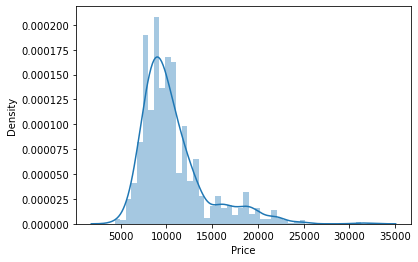

In [5]:
#Visualization of data
import seaborn as sns
sns.distplot(df['Price'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_08_04', ylabel='Density'>

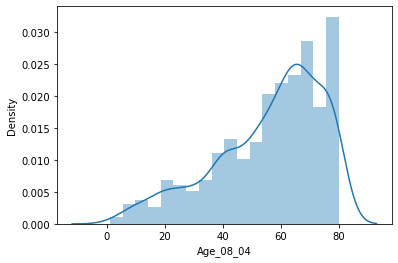

In [6]:
sns.distplot(df['Age_08_04'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

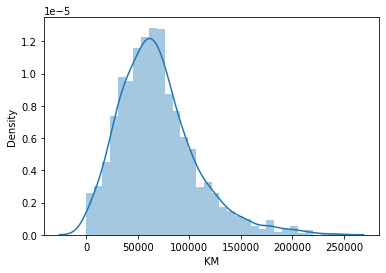

In [7]:
sns.distplot(df['KM'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

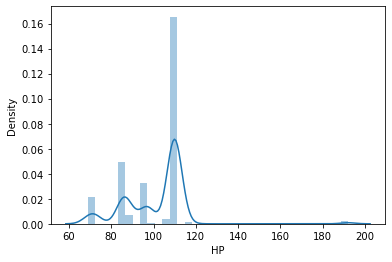

In [8]:
sns.distplot(df['HP'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc', ylabel='Density'>

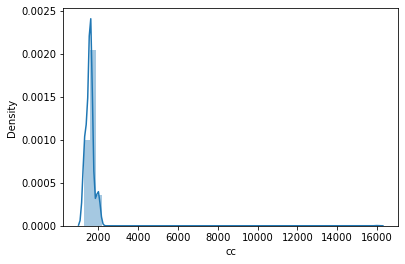

In [9]:
sns.distplot(df['cc'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

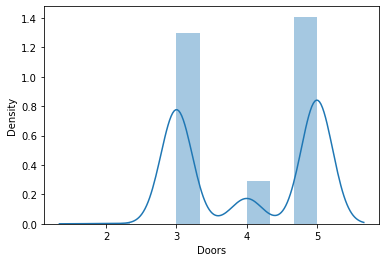

In [10]:
sns.distplot(df['Doors'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

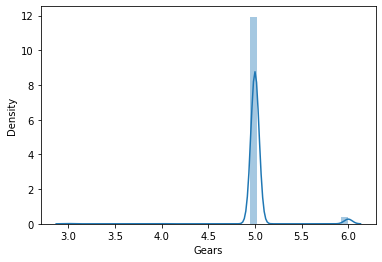

In [11]:
sns.distplot(df['Gears'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Density'>

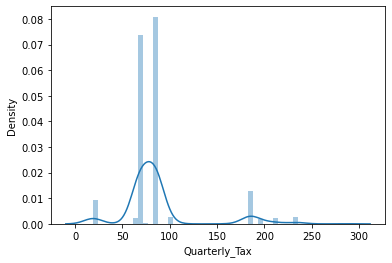

In [12]:
sns.distplot(df['Quarterly_Tax'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

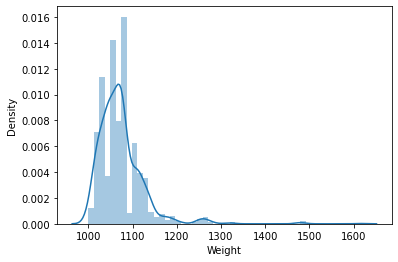

In [13]:
sns.distplot(df['Weight'])

In [14]:
#preparing a model
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()

In [15]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [17]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [18]:
#Type Markdown and LaTeX: 𝛼2

In [19]:
y = df[["Price"]]
x = df[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [22]:
y_pred = model.predict(x)
print(y_pred)

[[16812.58050518]
 [16272.35518581]
 [16800.73245987]
 ...
 [ 8454.29800682]
 [ 8578.03812148]
 [10402.43833285]]


In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
                                                    

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((1077, 8), (1077, 1), (359, 8), (359, 1))

In [ ]:
#ridge regression:
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# ridge coefficient 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 


In [ ]:
#Visualization
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coeff)

In [ ]:
# Lasso regression:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

#lasso coefficient
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

In [ ]:
#Visualization
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

In [ ]:
#ElasticNet:
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

#ElasticNet coefficient 
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


In [ ]:
#Visualization
import seaborn as sns
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)

In [ ]:
#Q.2
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [24]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
df1=df.rename({"R&D Spend":"RDspend","Marketing Spend":"Marketing_Spend"},axis=1)

In [28]:
df2=df1.replace(('New York','California','Florida'),(0,1,2))
df1

,RDspend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
df = df2[["RDspend","Administration","Marketing_Spend","State","Profit"]]
df.head()

,RDspend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [30]:
#check for missing values
df.isna().sum()

RDspend            0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [31]:
#correlation matrix
df.corr()

,RDspend,Administration,Marketing_Spend,State,Profit
RDspend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


# Scatterplot between variables along with histograms

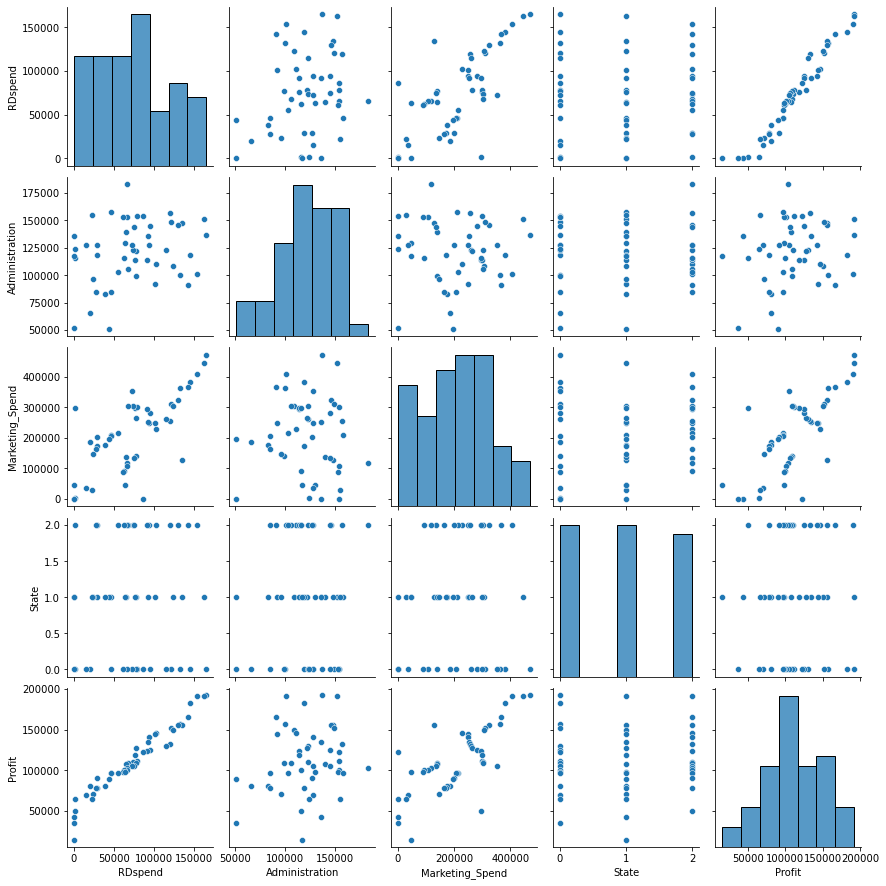

In [32]:
#Format the plot background and scatter plots for all the variables
sns.pairplot(df)

# Preparing a model

In [33]:
import statsmodels.formula.api as smf 
model=smf.ols("Profit~RDspend+Administration+Marketing_Spend+State",data=df).fit() 

In [34]:
 model.params

Intercept          50044.735788
RDspend                0.806049
Administration        -0.026987
Marketing_Spend        0.027027
State                118.514656
dtype: float64

In [35]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept           7.434432
RDspend            17.568861
Administration     -0.522554
Marketing_Spend     1.602332
State               0.071850
dtype: float64 
 Intercept          2.322116e-09
RDspend            9.017776e-22
Administration     6.038483e-01
Marketing_Spend    1.160794e-01
State              9.430398e-01
dtype: float64


In [36]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507516438334586, 0.9463740121742105)

In [37]:
model.resid

0      -118.647771
1      2655.328032
2      8791.844699
3      9332.094259
4     -6069.143956
5     -6466.010999
6     -2026.652521
7     -4381.650568
8       595.542758
9     -5126.886735
10    10484.453203
11     8677.066705
12    12328.702597
13     6821.702840
14   -17067.119362
15   -16205.149776
16    10084.512123
17    -4694.439456
18    -4858.547210
19     7216.520304
20     1847.529891
21    -5868.415851
22    -4456.859211
23    -1365.217783
24    -4713.866047
25     5155.657759
26    -5000.071626
27    -9253.309592
28     1495.799424
29     -687.006355
30      343.105689
31     -103.337215
32    -1604.313665
33    -1253.289476
34     7686.442362
35     6085.983296
36    15315.154584
37      322.320910
38    11650.959592
39    -2727.709461
40     3428.413019
41     2875.035857
42      875.419090
43     9693.180641
44      572.715351
45    17374.182358
46    -6755.764361
47    -3948.742253
48   -13411.847650
49   -33545.668437
dtype: float64

In [38]:
#Test for Normality of Residuals (Q-Q Plot)
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

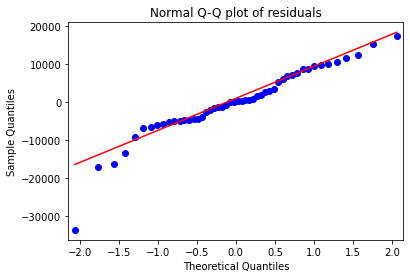

In [39]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [40]:
#Transformation:

In [41]:
#Sqrt Transformation
sqrt=np.sqrt(df)
sqrt

,RDspend,Administration,Marketing_Spend,State,Profit
0,406.631529,369.997027,686.865416,0.000000,438.476715
1,403.234051,389.072731,666.257105,1.000000,437.940704
2,391.716109,318.033882,638.697534,1.414214,437.093114
3,379.963696,344.487808,619.031195,0.000000,427.670422
4,376.971272,302.310718,605.118517,1.414214,407.661551
5,363.148592,315.934661,602.379747,0.000000,396.221049
6,366.899796,383.665049,357.374901,1.000000,395.123411
7,360.968323,381.484023,569.101643,1.414214,394.655039
8,347.192339,385.640960,558.223333,0.000000,390.143269
9,351.190660,329.665239,552.251410,1.000000,386.988320


In [42]:
data=sqrt[["RDspend","Administration","Marketing_Spend","State","Profit"]]
data

,RDspend,Administration,Marketing_Spend,State,Profit
0,406.631529,369.997027,686.865416,0.000000,438.476715
1,403.234051,389.072731,666.257105,1.000000,437.940704
2,391.716109,318.033882,638.697534,1.414214,437.093114
3,379.963696,344.487808,619.031195,0.000000,427.670422
4,376.971272,302.310718,605.118517,1.414214,407.661551
5,363.148592,315.934661,602.379747,0.000000,396.221049
6,366.899796,383.665049,357.374901,1.000000,395.123411
7,360.968323,381.484023,569.101643,1.414214,394.655039
8,347.192339,385.640960,558.223333,0.000000,390.143269
9,351.190660,329.665239,552.251410,1.000000,386.988320


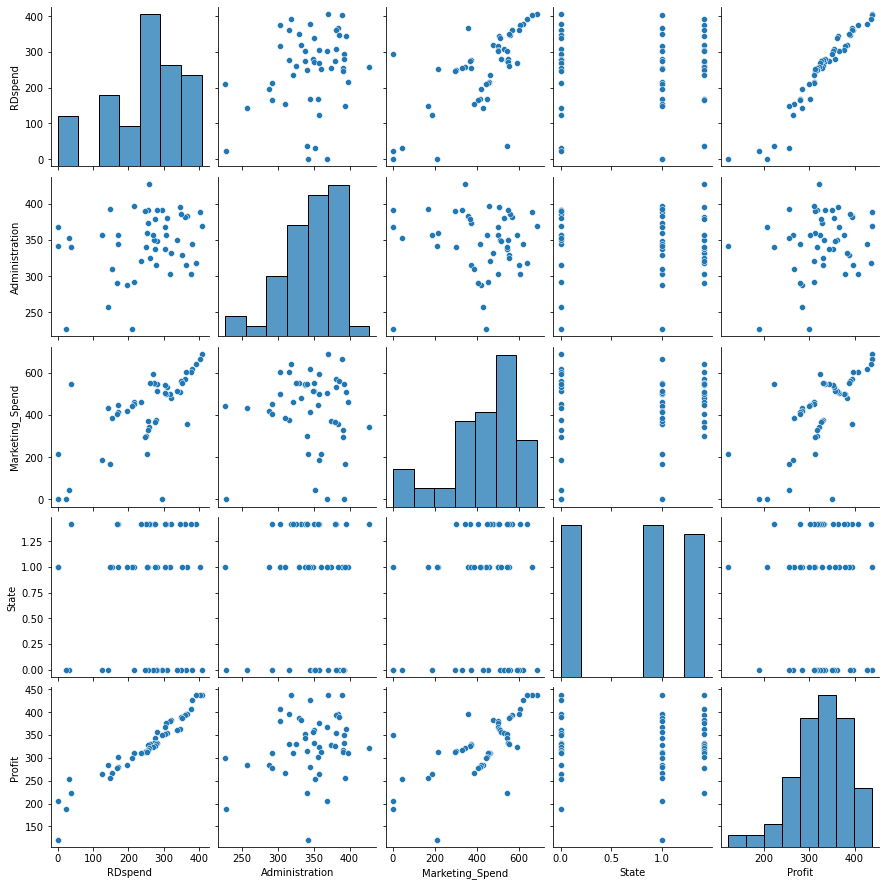

In [43]:
sns.pairplot(data)

In [44]:
#model building:
import statsmodels.formula.api as smf 
model1=smf.ols("Profit~RDspend+Administration+Marketing_Spend+State",data=data).fit() 

In [45]:
model1.params

Intercept          188.594832
RDspend              0.574923
Administration      -0.028409
Marketing_Spend      0.017262
State               -2.127272
dtype: float64

In [46]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)

Intercept           8.361070
RDspend            15.910390
Administration     -0.440522
Marketing_Spend     0.797383
State              -0.488181
dtype: float64 
 Intercept          1.033980e-10
RDspend            4.262182e-20
Administration     6.616682e-01
Marketing_Spend    4.294161e-01
State              6.277920e-01
dtype: float64


In [47]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9309094325885288, 0.9247680488186202)

In [48]:
model1.resid

0     14.754809
1     19.197028
2     24.310081
3     19.726722
4      3.488620
5     -2.579003
6      2.447466
7      2.553553
8      3.259369
9     -1.554176
10    14.319479
11    10.911586
12    16.060659
13     7.417075
14   -18.054205
15   -21.600286
16    10.343773
17    -9.756388
18    -6.991070
19     3.920173
20    -0.874006
21   -14.236609
22    -9.335739
23    -5.534494
24   -16.223278
25    -0.739016
26   -13.747839
27   -19.028257
28    -5.760747
29   -12.577466
30    -8.155745
31   -12.550905
32   -12.598573
33    -8.805927
34     3.998361
35    -0.849932
36    20.639929
37    -8.473760
38    14.506160
39   -13.783604
40    -1.637975
41    -1.412926
42    -5.303305
43    10.819370
44    -8.470553
45    57.285297
46    16.285624
47    30.287274
48    -6.643803
49   -59.252821
dtype: float64

In [49]:
#Test for Normality of Residuals (Q-Q Plot)
list(np.where(model1.resid>10))

[array([ 0,  1,  2,  3, 10, 11, 12, 16, 36, 38, 43, 45, 46, 47],
       dtype=int64)]

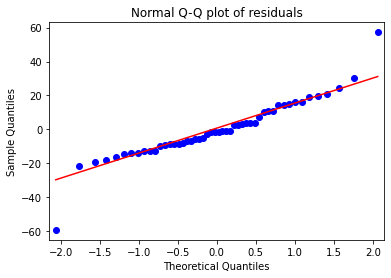

In [50]:
qqplot=sm.qqplot(model1.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [51]:
#Type Markdown and LaTeX:  𝛼2 

In [52]:
y = df[["Profit"]]
x = df[["RDspend","Administration","Marketing_Spend","State"]]

In [53]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [54]:
model2.fit(df[["RDspend","Administration","Marketing_Spend","State"]], df[["Profit"]])

LinearRegression()

In [55]:
y_pred = model2.predict(x)
print(y_pred)

[[192380.47776923]
 [189136.73196692]
 [182258.5452987 ]
 [173569.8957391 ]
 [172257.08395351]
 [163457.13099751]
 [158149.16251674]
 [160134.25056651]
 [151616.22724134]
 [154886.84673323]
 [135637.49679507]
 [135582.33329337]
 [129256.81740214]
 [127485.64715981]
 [149669.76935995]
 [146122.1897743 ]
 [116908.4178776 ]
 [130064.80945604]
 [129125.44720981]
 [115560.3396927 ]
 [116626.50011056]
 [117181.43585233]
 [114809.10921281]
 [110099.20778473]
 [113265.90604558]
 [102248.68224085]
 [110733.61162468]
 [114261.61959473]
 [101786.58057561]
 [101691.64635406]
 [ 99594.48431042]
 [ 97586.8972147 ]
 [ 99032.15366377]
 [ 98032.20947717]
 [ 89026.3576401 ]
 [ 90393.52670572]
 [ 75393.03541918]
 [ 89626.81909106]
 [ 69578.10041077]
 [ 83733.46946241]
 [ 74811.49698385]
 [ 74923.79414443]
 [ 70623.07091169]
 [ 60065.79935976]
 [ 64627.61465015]
 [ 47551.89764388]
 [ 56246.51436723]
 [ 46508.47225505]
 [ 49085.2576502 ]
 [ 48227.06843893]]


In [56]:
#Detecting Influencers/Outliers

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

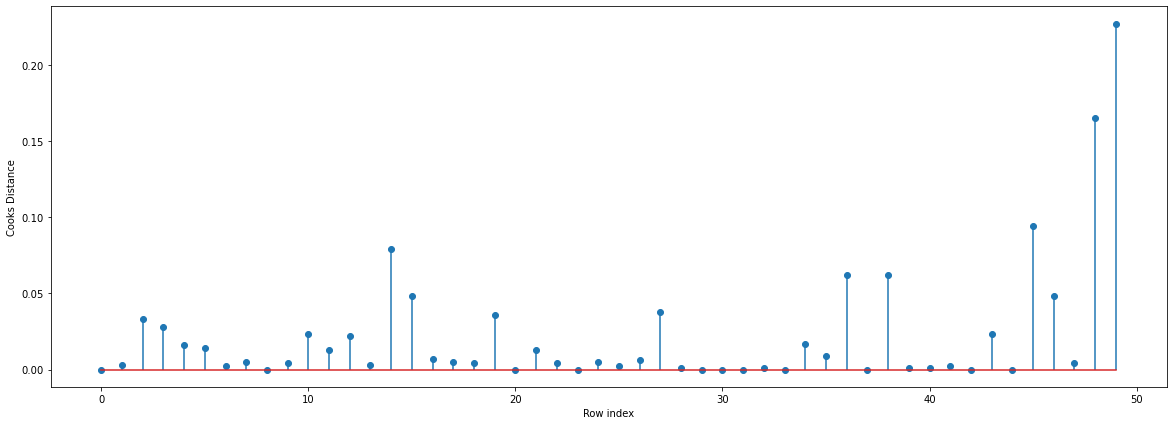

In [57]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [58]:
#index of the data points 
(np.argmax(c),np.max(c))

(49, 0.22675297053675378)

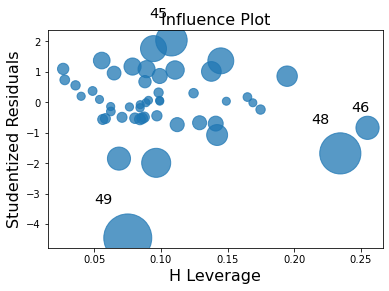

In [59]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [60]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [61]:
leverage_cutoff

0.36

In [62]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

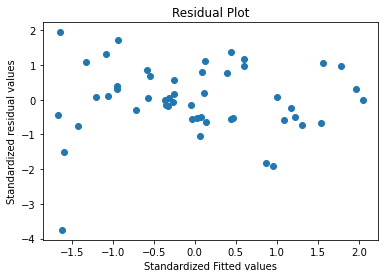

In [63]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [64]:
#Residual Vs Regressors

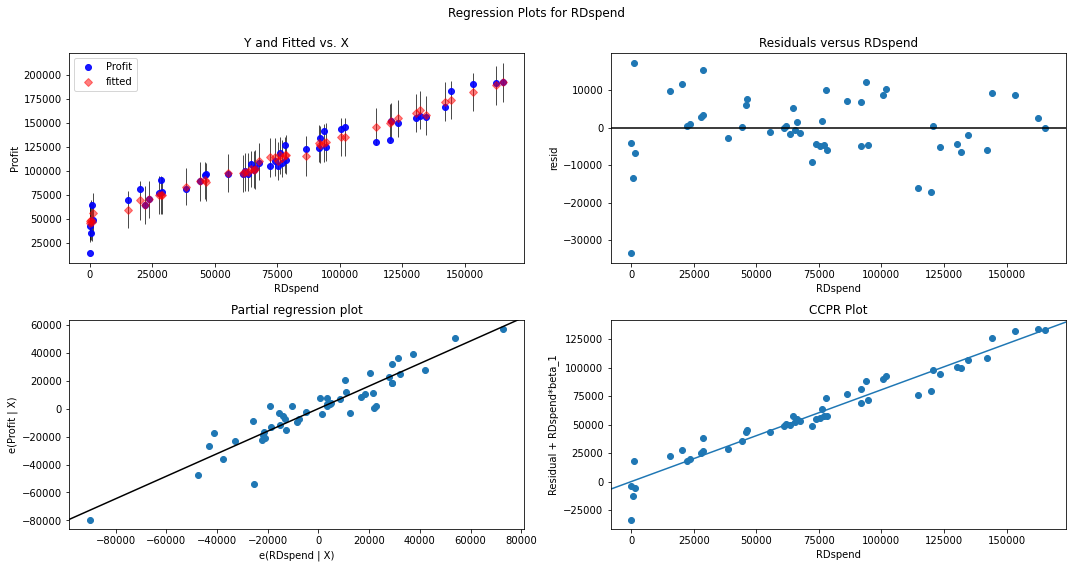

In [65]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

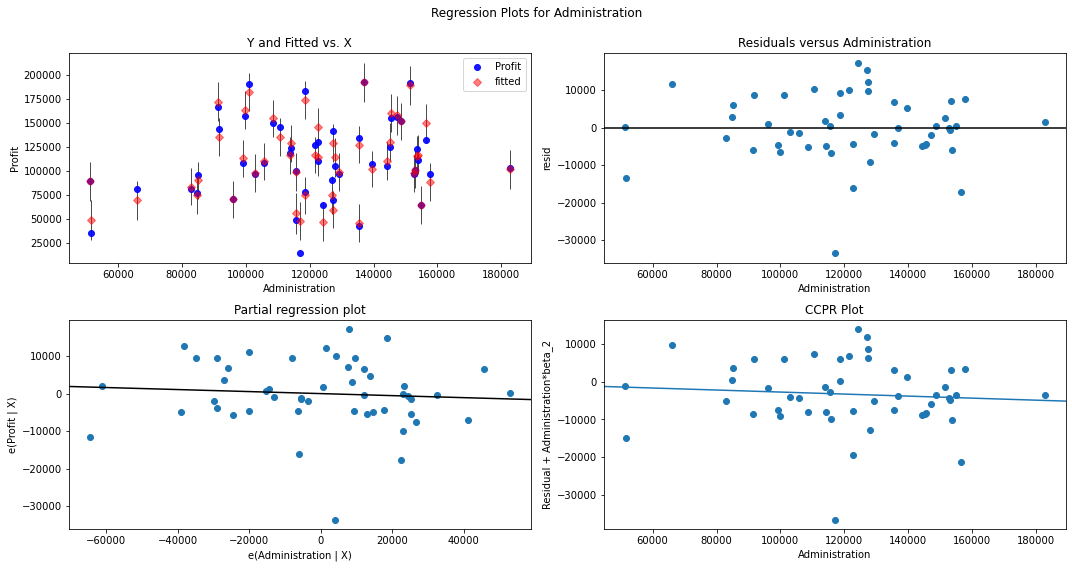

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

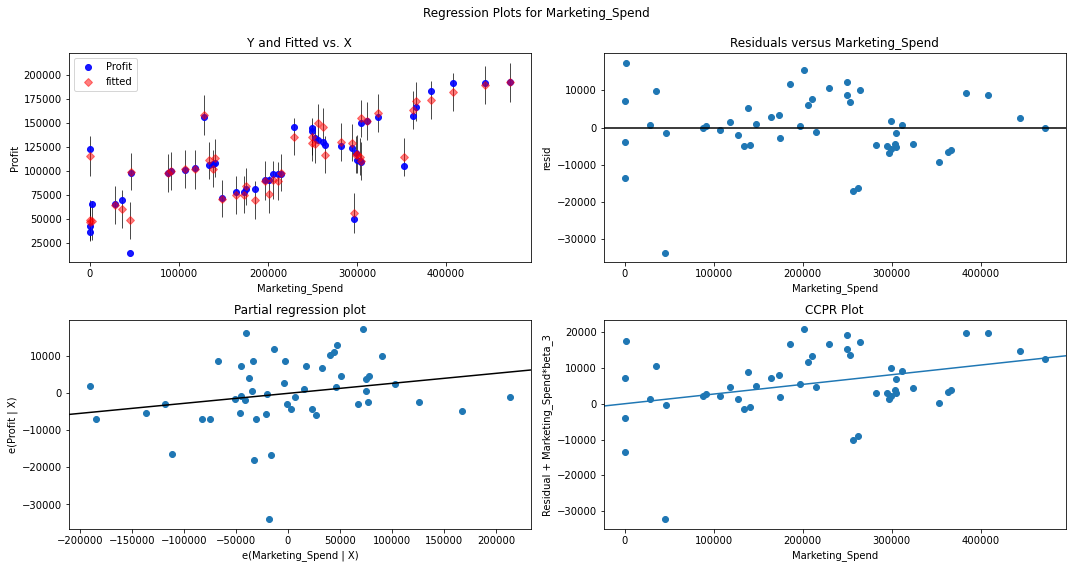

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

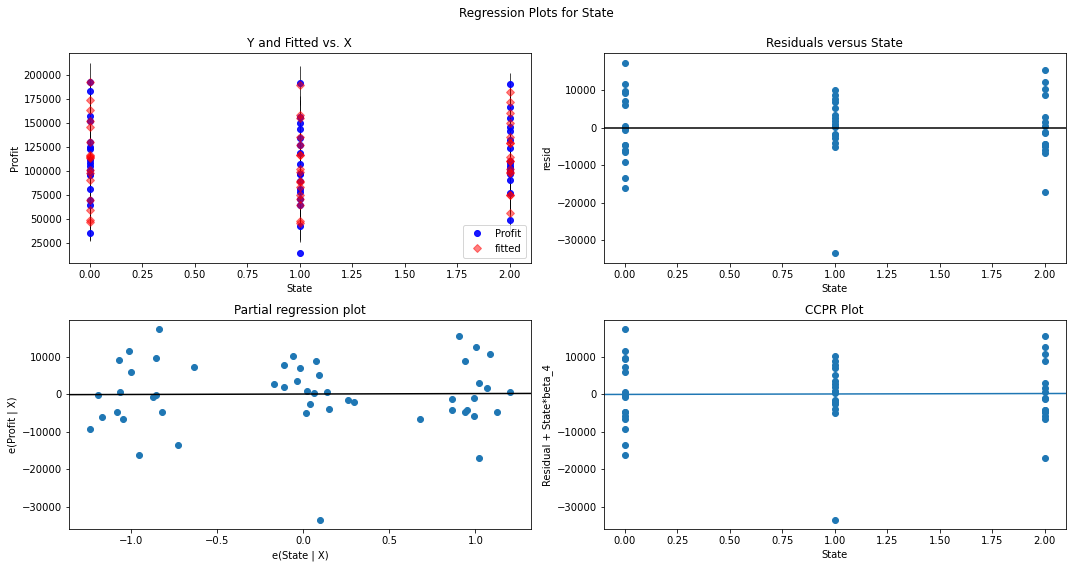

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()